# Large data visualization
author: Felipe Delestro (fima@dtu.dk)

In [1]:
import qim3d
import matplotlib.pyplot as plt
import ipywidgets
import sys
import time

In [2]:
# Helper functions

def sizeof(obj, suffix="B"):
    num = sys.getsizeof(obj)
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if abs(num) < 1024.0:
            print (f"Object size: {num:3.1f} {unit}{suffix}")
            return
        num /= 1024.0
    print (f"Object size: {num:.1f} Y{suffix}")
    
def show_slices(vol, zpos, ypos, xpos):
    
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
    
    z_slice = vol[zpos,:,:].copy()
    axs[0].imshow(z_slice)
    axs[0].axis("off")
    
    y_slice = vol[:,ypos,:].copy()
    axs[1].imshow(y_slice)
    axs[1].axis("off")
    
    x_slice = vol[:,:,xpos].copy()
    axs[2].imshow(x_slice)
    axs[2].axis("off")
    
    plt.show()
    
def interact(vol):
    slider = ipywidgets.IntSlider
    widget = ipywidgets.interactive(show_slices,
                                    vol = ipywidgets.fixed(vol),
                                    zpos = slider(min=0, max=vol.shape[0]-1, value=int(vol.shape[0]/2)),
                                    ypos = slider(min=0, max=vol.shape[1]-1, value=int(vol.shape[1]/2)),
                                    xpos = slider(min=0, max=vol.shape[2]-1, value=int(vol.shape[2]/2)))
    return widget

In [3]:
# Large file (7.6 GB)
data_path = "/dtu/3d-imaging-center/QIM/QIM_sandbox/fima/Mock-01_FoV_4_B1_recon_uint8.tif"

# Medium file (2.8 GB)
# data_path = "/dtu/3d-imaging-center/QIM/QIM_sandbox/fima/Animal_Mandible.tif"

# Small file (16 MB)
# data_path = "/dtu/3d-imaging-center/QIM/QIM_sandbox/fima/blobs_256x256x256.tif"

In [4]:
vol = qim3d.io.load(data_path, virtual_stack=True)
sizeof(vol)
print (f"Object shape: {vol.shape}")

# Get mid coordinates
zmid = int(vol.shape[0]/2)
ymid = int(vol.shape[1]/2)
xmid = int(vol.shape[2]/2)

Object size: 168.0 B
Object shape: (2016, 2030, 1988)


# Check time to read slices

Process done in 0.209 seconds
Object size: 3.8 MB


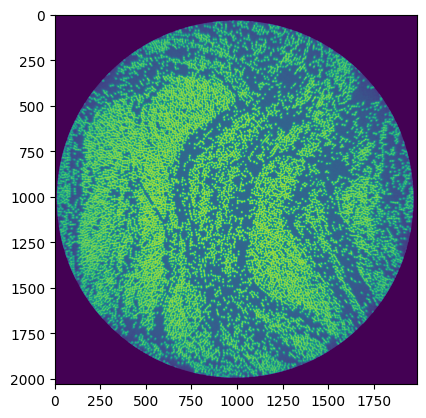

In [5]:
# First dimension
start_time = time.time()
slice2d = vol[zmid,:,:].copy()
print(f"Process done in {(time.time() - start_time):.3f} seconds")
sizeof(slice2d)
plt.imshow(slice2d)
plt.show()

Process done in 14.115 seconds
Object size: 3.8 MB


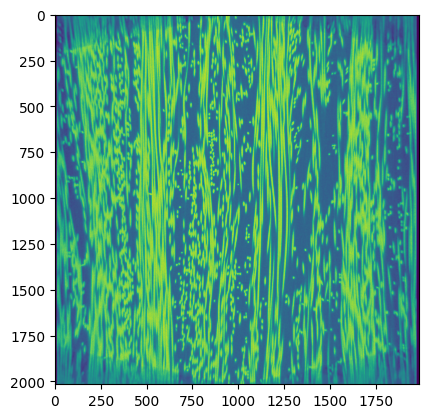

In [6]:
# Second dimension
start_time = time.time()
slice2d = vol[:,ymid,:].copy()
print(f"Process done in {(time.time() - start_time):.3f} seconds")
sizeof(slice2d)
plt.imshow(slice2d)
plt.show()

Process done in 59.076 seconds
Object size: 3.9 MB


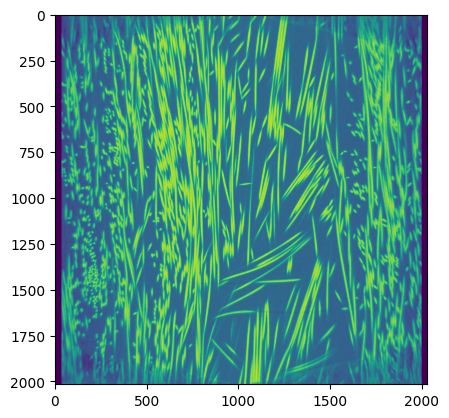

In [7]:
# Third dimension
start_time = time.time()
slice2d = vol[:,:,xmid].copy()
print(f"Process done in {(time.time() - start_time):.3f} seconds")
sizeof(slice2d)
plt.imshow(slice2d)
plt.show()

In [ ]:
interact(vol)